<a href="https://colab.research.google.com/github/AlexW0316/Milk-Quality-535-project-/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stochastic subgradient Descent for Soft-margin Linear SVM Classifier**##
**Wyatt Meng    jmeng36@wisc.edu**

**Yicen Yang    yyang643@wisc.edu**

**Ziyi Wang     zwang2664@wisc.edu**

(alphabetical order)






###**README:A brief content**###
**1.Background and Motivation**

**2. Theory**

*      2.1 Support Vector Machine (SVM)
*      2.2 Hinge Loss ($l^{hinge}$)
*      2.3 Stochastic Subradient Descent (SSGD)



**3. Implementation and Data**
*      3.1 SSGD Algorithm step by step
*      3.2 Data
*      3.3 SSGD Algorithm Implementation and Result


**4. Reference**

#1. Background and Motivation#
We have learned k-Means clustering which is an unsupervised centroid-based classification method used when we have an unlabeled dataset. However, if our dataset is labeled, the Support Vector Machine (SVM), a supervised algorithm, will be an appropriate choice for classification.  

Professor introduced Gradient Descent (GD), Subgradients, and Stochasticity in the lecture. In this project, we construct a Stochastic Subgradient Descent (SSGD) algorithm on our own with two objectives: generalize GD to indifferentiable functions optimization and reduce the computational burden. We will demonstrate it by minimizing the not differentiable hinge loss function in SVM.


#2. Theory#
###**2.1 Support Vector Machine (SVM)**###


####**2.1.1 Hard Support Vector Machine (hard-SVM)**####
The hard support vector machine (hard-SVM) is a supervised algorithm for classification. The intuition for hard-SVM is finding the best hyperplane with the maximum separation in an N-dimensional space where N refers to the number of features. For example, plot 1 illustrates the logic of finding the "best" hyperplane for binary classification by hard-SVM when there are two features. Among the many possible hyperplanes on the left plot, the SVM chooses the "optimal" one, as shown right plot, that maximizes the margin between two clusters. Before giving the compact definition for hard-SVM, we need to introduce the concept of margin to define the degree of linear separation.

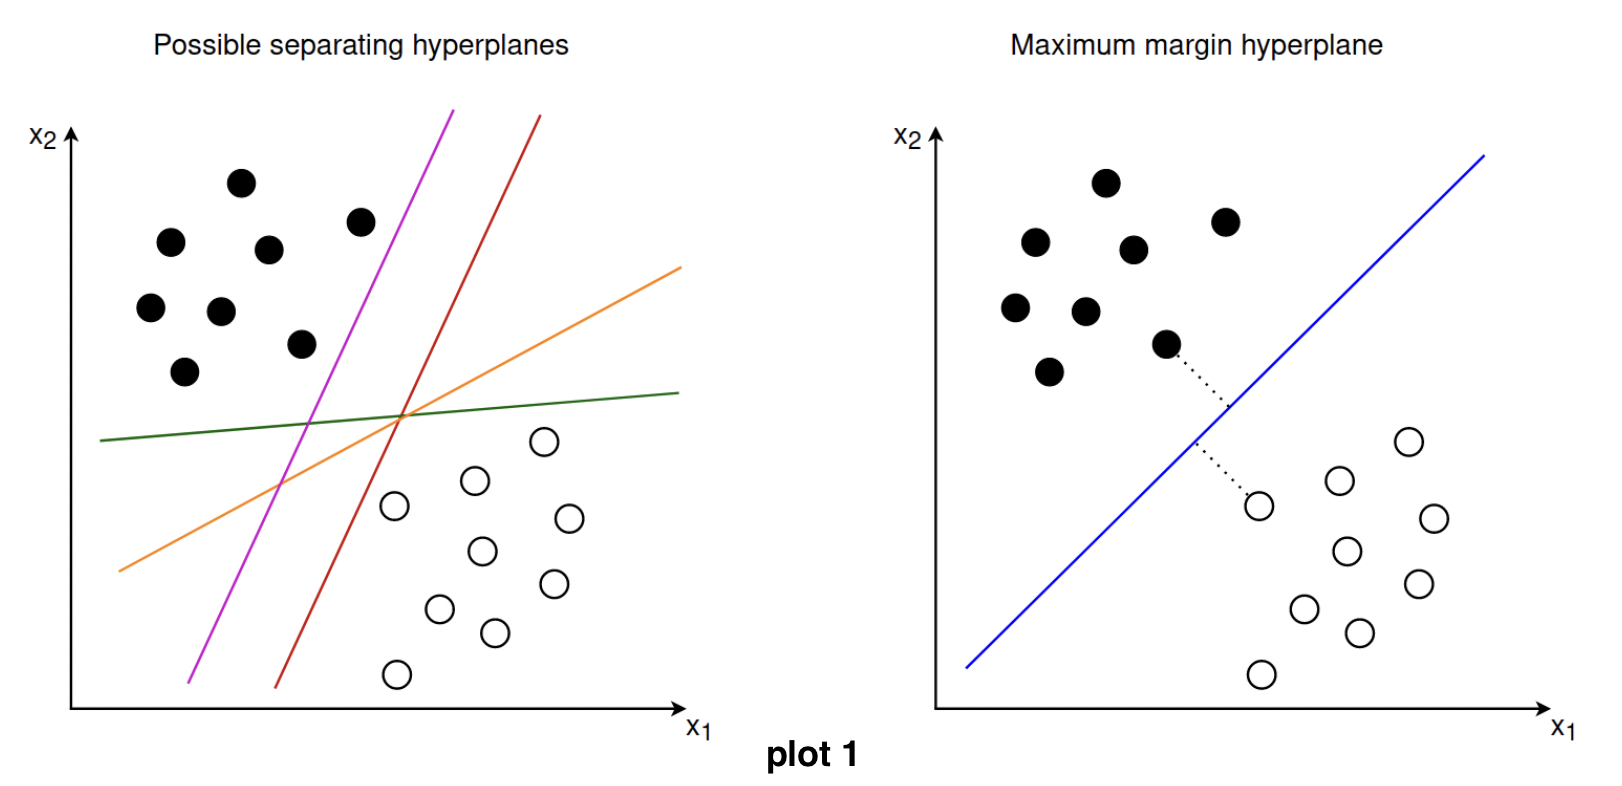

[plot 1 is cited from](https://alpopkes.com/posts/machine_learning/support_vector_machines/)

####**2.1.2 Margin and SVM**####

To define the margin of a hyperplane, we first need to know how to define the linear separability of a training set and the distance between a point and the hyperplane.

#####**Definition 1: Linearly separable**#####
Let $S$ be the training set with data points $(\mathbf{x}_1,y_1),...,(\mathbf{x}_m,y_m)$ where $\mathbf{x}_i\in\mathbb{R}^d$ and $y_i\in\{\pm1\}$. We say a training set is linearly separable if there exists a halfspace, $(\mathbf{w},b)$, such that $y_i=sign(<\mathbf{w},\mathbf{x}_i>+b)$ for all $i$, where b is a constant. This condition can also be written as
$$\forall i\in[m], y_i(<\mathbf{w},\mathbf{x}_i> +  b) > 0$$
(Shai and Ben-David, 2014, p.202)


#####**Definition 2: Distance**#####

Let a hyperplane be $(\mathbf{w},b)$ where $||\mathbf{w}|| = 1$. We say the distance between a point $\mathbf{x}$ and the hyperplane is $|<\mathbf{w},\mathbf{x}>+b|$.

With the knowledge of linear separability and distance, we can further define what the margin is.

Complete proof see in (Shai and Ben-David, 2014, p.203)

#####**Definition 3: Margin**#####  
Given a linear separable training set, the margin of a hyperplane is defined to be the minimal distance between a point in the training set and the hyperplane.
(Shai and Ben-David, 2014, p.203)

#####**Definition 4: Hard Support Vector Machine (hard-SVM)**#####  

In compact notation, hard-SVM's objective is  
$$argmax_{(\mathbf{w},b):||\mathbf{w}||=1}\text{ }\min_{i\in[m]} |<\mathbf{w},\mathbf{x}_i>+b|\text{ s.t. }\forall i\text{, }y_i(<\mathbf{w},\mathbf{x}_i>+b) > 0$$
When there is a solution to this problem, we can rewrite the problem as follows:
$$argmax_{(\mathbf{w},b):||\mathbf{w}||=1}\text{ }\min_{i\in[m]} y_i(<\mathbf{w},\mathbf{x}_i>+b).$$
 (Shai and Ben-David, 2014, p.203, Equation 15.1)

####**2.1.3 Soft-margin Linear Support Vector Machine (soft-SVM)**####

In this project, we focus on the optimization problem of Soft-margin Linear Support Vector Machine (soft-SVM). Intuitively, soft-SVM generalizes the SVM by discarding assumption in hard-SVM that all datapoints are linearly separable.

For this purpose, we introduce nonnegative slack variables $\xi_1$,...,$\xi_m$ and the variable $\xi_i$  is used to measure how much the constraint $y_i(<\mathbf{w},\mathbf{x}_i>+b)\ge1\text{, }\forall{i}$ of the hard-SVM optimization problem is violated.
Then, the constraints of the optimization problem are modified to

$$y_i(<\mathbf{w},\mathbf{x}_i>+b)\ge1-\xi_n\text{, }\forall{i}$$

In the soft-SVM optimization problem, we aim to minimize both the norm of $\mathbf{w}$, which is referred to as the margin (in Definition 3), and the average of $\xi_i$.
(Shai and Ben-David, 2014, p.206)

Plot 2 provides a sketch of why a soft-SVM linear classifier is useful.

Two colors, pink and green, represent two different clusters. Grey data points are in cluster#1, while green data points are in cluster#2. However, the circled green dots are in cluter#1, and the circled grey dots are in cluter#2. There is no linear separation that can correctly capture this complicated layout. We need a non-linear boundary and a soft margin SVM. The black line represents the most optimal hyperplane found by the hard margin classifier, which is not very ideal.

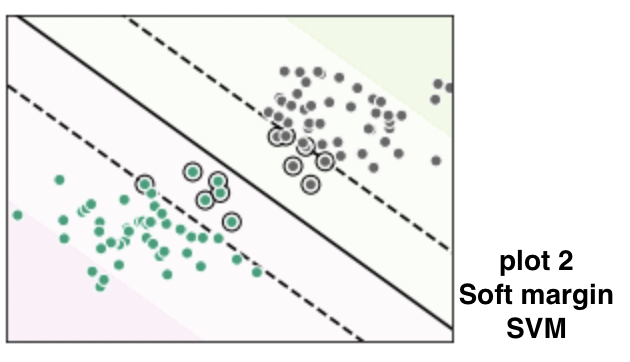

#####**Definition 5 (Soft-SVM)**#####
In compact notation, hard-SVM's objective is

$$\min_{\mathbf{w},b,\mathbf{\xi}}(l||\mathbf{w}||^2+\frac{1}{m}\sum_{i=1}^{m}\xi_i\text{ where } l>0$$
$$\text{s.t. }\forall{i} \text{ } y_ic\ge1-\xi_n\text{and }\xi_i\ge0$$
(Shai and Ben-David, 2014, p.207, Equation 15.4)

###**2.2 Hinge Loss**###

#####**Definition 6 (Hinge Loss)**#####
Assume $y\in{-1,1}$ and the decision rule is $h(\mathbf{x})=sign(f(\mathbf{x}))$ with $f(\mathbf{x})=\mathbf{w}^T\mathbf{x}+b$,
$$l^\text{hinge}(f(\mathbf{x}),y)=\begin{cases}1-yf(\mathbf{x}) & yf(\mathbf{x})< 1 \\0 & \text{otherwise} \end{cases}$$

We can also write a convenient version of hinge loss:
$$l^{hinge}(f(\mathbf{x}),y)=max\{0,1-yf(\mathbf{x})\}=(1-yf(\mathbf{x}))_+$$

Revisit to 2.1.3 Equivalent Equation of Soft-SVM

By the definition of the hinge loss, we know its formula
$$l^{hinge}((\mathbf{w},b),(\mathbf{x},y))=max\{0,1-y(<\mathbf{w},\mathbf{x}>+b)\}$$
Given $(\mathbf{w}, b)$ and the training set S, we denote the average hinge loss on S as $L_{S}^{hinge}((\mathbf{w},b))$. Then, the optimization problem can be rewritten into the following formula
$$\min_{\mathbf{w},b}(l||\mathbf{w}||^2+L_{S}^{hinge}((\mathbf{w},b)))$$
(Shai and Ben-David, 2014, p.207, Equation 15.5)

*Notation:* Detailed proof of why 15.4 and 15.5 are equivalent is also in (Shai and Ben-David, 2014, p.207)

In this way, we transform the soft-SVM problem into the paradigm of the regularized loss minimization problem.

###**2.3 Stochastic Subradient Descent (SSGD)**###
SSGD aims to find the optimal condition of an objective function. Instead of using the actual gradient, this method uses the subgradients calculated from randomly selected subsamples of the training set. Since by using SSGD, we don't need to check all the training points to calculate the descent direction. Instead, we just need to analyze one subsample at a time. This algorithm costs less effort and is much faster. Considering that our goal of Soft-SVM is to find the solution to Equation 15.5, SSGD would be a great tool to help find the solution. However, firstly, we need to show that the Soft-SVm equation is convex. If it is a convex function, we can further use the SSGD algorithm.

####**2.3.1 Convexity of SVM Function**####

**Claim 1:** SVM optimization function is convex. i.e.
$\frac{1}{2}||\mathbf{w}||^2+C\sum_{i=1}^{m}\max(0,1-y_i(\mathbf{wx_i}+b))$ is convex.

*Proof:* According to the knowledge we learned from the lecture, the sum of two convex functions is a convex function. Based on this idea, we want to show the two parts of the function are both convex.

a. Since $||\mathbf{w}||^2$ is in the form of a standard parabola, it is a convex function.

b. The other part of the function can be written in the form $\max(0,1-\mathbf{w}^T\mathbf{\alpha})$ where $\alpha$ is a vector. Since both parts in max are linear and the max of two linear functions is convex, we prove the second part of this function is convex.

Hence, we prove that the SVM optimization function is convex.

Proof idea from (Goyal, 2017)

####**2.3.2 SSGD**####


####**2.3.2.1 Compute Subgradient**####

Since the loss function is not differentiable when $y_i(wx_i+b) = 1$, we use the subgradient in this case.
$$\nabla_wL(\mathbf{w})=\nabla_w(\frac{1}{m}L(y_i\mathbf{w}^{T}x_i+l||\mathbf{w}||^2)$$
$$=\frac{1}{m}\sum_{m=1}^{m}\nabla_wL(y_i\mathbf{w}^Tx_i)+2l\mathbf{w}$$
when $y_i(wx_i+b)\ne1$, otherwise it is undefined.

For convenience, we use the indicator function
$$I_{\{y_iw^Tx_i<1\}}=\begin{cases}1 & y_iw^Tx_i< 1\\0 & y_iw^Tx_i\ge 1 \end{cases}$$
####**Claim 2:**####
Therefore, the subgradient of loss function can be written as
$$\nabla_wL(\mathbf{w})=\frac{1}{m}\sum_{m=1}^{m}(-y_ix_iI_{\{y_iw^Tx_i<1\}})+2l\mathbf{w}$$

(Alex J. and Schölkopf, 2004, p.3)

####**2.3.2.2 SSGD Algorithm**####

The SSGD Algorithm can be presented in the following steps:

**STEP 1:**
Choose an initial vector of parameters $\mathbf{w}$ and learning rate $\eta$.

**STEP 2:**
Repeat a certain large number of times$^{[1]}$:

  SubStep 1: Randomly shuffle samples in the training set.

  SubStep 2: Pick a random sub-sample $\mathbf{B}\subseteq{1,...,n}$ of size B$^{[2]}$ and then the update is
  $$\mathbf{w} = \mathbf{w} - \eta\nabla Q_{\mathbf{B}}(\mathbf{w})$$
  where $Q(\mathbf{w})$ is the function we want to solve.

(Shai and Ben-David, 2014, p.197)

  *Notations: (Some modification to the original algorithm)*

  [1] We do not use accuracy to determine when we should stop since it might cost numerous time in our project. In the implementation part, we choose 10000 times which is reasonable to find the approximate minimum.
  
  [2] We use the mini-batch with batch size equal to forty to do the iterative stochastic approach which is similar to the example shown in the lecture.


#3. Implementation and Data#
###**3.1 SSGD step by step**###


In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn import svm
from io import StringIO
from numpy.random import default_rng
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)
rng = default_rng(535)

####**Function 1: Gradient Update**####

To demonstrate stochastic subgradient descent(SSGD) method in optimizing the Support Vector Machine(SVM) by minimizing the hinge loss function discussed above, we run such an algorithm in the milk dataset. First of all, we need a function gradient function as input so we can compute the gradient itself, as well as a current iterate and a step size called beta in our project.
If the input is $\mathbf{w}^{(t)}$, the output will be $\mathbf{w}^{(t+1)}=\mathbf{w}^{(t)}-\beta\nabla_wL(w)$

In [ ]:
#descent update
def desc_update(subgrad_fun, x , y, old_w,beta):
    gradient = subgrad_fun(x, y,old_w,l=1/2)
    return old_w - beta*gradient

####**Function 2: Hinge Loss Function**####

We have shown that finding the optimal hyperplane suffices to solve the hinge loss minimization problem. We define our hinge loss function by the definition above in the theory part. Therefore, we implement the following formula
$$\min_{\mathbf{w},b}(l||\mathbf{w}||^2+L_{S}^{hinge}((\mathbf{w},b)))$$

In [ ]:
def loss_fun(x,y,w,l=1/2):
  iter=x.shape[0]
  temp=0
  for i in range(iter):
    temp=temp+max(0,(1-y[i]*(w@x.T[:,i]))[0])
  return l*LA.norm(w)**2+temp/iter

####**Function 3: Subgradient Function**####

From the theory part, we showed that the subgradient of loss function can be written as
$$\nabla_wL(\mathbf{w})=\frac{1}{m}\sum_{m=1}^{m}(-y_ix_iI_{\{y_iw^Tx_i<1\}})+2l\mathbf{w}$$

In [ ]:
def subgrad_fun(x,y,w,l=1/2): # subgradient function
  iter=x.shape[0]
  temp_L=0
  for i in range(iter):
    if(y[i]*(np.dot(w.T,x[i,:]))<1):
      temp_L=temp_L-y[i]*x[i,:]

  return 2*l*w+temp_L/iter

####**Function 4: Prediction Function**####



In [ ]:
def pre_fun(x,y,w):  #prediction function
  yhats=np.sign(w@x.T)
  return(yhats)



####**Function 5: Accuracy Function**####

In [ ]:
def acc(x,y,w):#accuracy function
  return np.mean(sum(np.sign(w@x.T)==y.T))


For convenience, we can set the bias term b to 0 because, in this way, we consider the soft-SVM for learning a homogenous halfspace. As a result, the optimization problem can be written as
$$\min_{\mathbf{w},b}(l||\mathbf{w}||^2+L_{S}^{hinge}(\mathbf{w})),$$
where
$$L_{S}^{hinge}(\mathbf{w})=\frac{1}{m}max\{0,1-y(<\mathbf{w},\mathbf{x}>)\}$$

###**3.2 Data**###
####**3.21 Data Preprocessing**####
This dataset is from kaggle: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality. The dataset is manually collected and labeled from observations about milk features and quality.

We assume that our seven features,i.e. pH, Temperature, Taste, Odor, Fat, Turbidity, and Color, are identically independently distributed. The true label (Grader) shows the quality of the milk: Low (Bad), Medium (Moderate), or High (Good).

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving milknew.csv to milknew (1).csv
User uploaded file "milknew.csv" with length 26586 bytes


Among our seven features, three are numerical variables

**pH：** the pH value of the milk ranges from 3 to 9.5

**Temperature：** the milk's Temprature in degrees Celsius, ranging from 34℃ to 90℃

**Color：** the milk color ranges from 240 to 255

While others (**Taste**, **Odor**, **Fat**, **Turbidity**) are discrete categorical variables with values either 0 or 1.

We try to apply our Soft-SVM to build a model that could tell how to get high-quality milk, which may help with the dairy industry, and we will use all seven variables as our input and try to predict the quality of milk.

In [ ]:
df1 = pd.read_csv('milknew.csv')
df1.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
#sns.countplot(df1['Grade'])

####**3.21 Data Preprocessing**####

**3.11 Class Imbalance solution**
The original dataset has three labels. We originally thought we could set the label as high and not high. But the confusion matrix showed that there is little predicted high. One possibility is that the model is trained in a dataset that is skewed toward not high, i.e. the proportion of data entries with a not high label is significantly higher than that of the high label. This unbalanced dataset distribution may lead to ungeneralized results(Nathalie and Shaju, 2002, p.3). For instance, the model can try to predict one class only. We addressed it by taking a subset of this dataset. We notice that after removing the low label, we have a more even amount of data in the other two categories. This facilitates the model to give meaningful results (Nathalie and Shaju, 2002, p.3).



In [ ]:
df = df1[df1.Grade!='low'] #drop Grade = low data

**3.12 Sclaing the data to [0,1]**

As we can see, the values of pH, temperature, and color are not in [0,1]. If we keep using these values, the predictions would be affected negatively. Therefore, we need to rescale these values (i.e. standardize these values) by using the formula: $$x_{new}=\frac{x_{old}-x_{min}}{x_{max}-x_{min}}$$
where $x_{new}$ is the standardized value, $x_{old}$ is the value read from dataset, $x_{min}$ and $x_{max}$ are the minimal and maximal values of all x.
Then, we show the output of the new value of PH which should be in [0,1].
We used the "max ~ min" Normalization rescaling formula as mentioned above to rescale our data.

In [ ]:
df.pH=(df.pH-min(df.pH))/(np.max(df.pH)-np.min(df.pH))
df.Temprature=(df.Temprature-min(df.Temprature))/(np.max(df.Temprature)-np.min(df.Temprature))
df.Colour	=(df.Colour	-min(df.Colour))/(np.max(df.Colour)-np.min(df.Colour))
dfhigh = df[df.Grade =='high']
dfmedium = df[df.Grade =='medium']
print(df.head())

     pH  Temprature  Taste  Odor  Fat   Turbidity    Colour   Grade
0  0.50    0.090909      1     0     1          0  0.933333    high
1  0.50    0.181818      0     1     0          1  0.866667    high
4  0.50    0.272727      0     0     0          0  1.000000  medium
5  0.50    0.272727      1     1     1          1  1.000000    high
9  0.75    1.000000      1     1     0          0  0.466667  medium


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
X=df[:]
X=X.iloc[: , :-1]
X=X.to_numpy()
one=np.ones(len(X))
X=np.c_[X,one]  # add intercept terms, which are just ones so that w=[w,b], X=[X,1].T, w*X=wX+b
#print(X[:,0:10])
y=(((df[['Grade']]=="high"))+0).to_numpy() #convert True/False to 1/0
y[y==0]=-1 #convert 1/0 to 1/-1, which helps to construct SVM

In [ ]:
dfhigh = df[df.Grade =='high']
dfmedium = df[df.Grade =='medium']

In [ ]:
#sns.pairplot(df, corner=True, hue='Grade')
#sns.pairplot(df, hue="Grade", diag_kind="hist")

###**3.3 SSGD Algorithm Implementation and Results**###
####**3.31 SSGD Algorithm Implementation**####

We performed 80%, and 20% train-test-split and performed supporting vector machine optimization by calling the stochastic subgradient descent method we realized above.

More importantly, the professor discusses the importance of learning rate to gradient descent algorithm. We chose a diminishing learning rate ($\beta$): $$\beta = \frac{1}{|i|},$$ where $i \in [1, 10000 ]$.

We wrote a for loop to input different learning rate values into the model. Since $\beta$ has a positive relationship with the rate of convergence[cite]. The convergence rate is higher at the beginning of the iterative procedure and slowly decreases as we are getting closer to the optimal solution (Scott, Dieuleveut, and Flammarion, 2020., p.1). In class, we also discussed that when the step size is small, more iterations will be required to converge, which will take more computational resources. When the step size is too large, the optimal solution may be missed (Scott, Dieuleveut, and Flammarion, 2020., p.1).

Then we chose the confusion matrix and related measurements to visualize and quantify our model performance. We evaluated and analyzed our results.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                              random_state=0, stratify=y)

In [ ]:
#initialize w and b
w_new = np.array([0,0,0,0,0,0,0,0])  # w_new=[w,b]
#create empty list
w_list = [w_new]
cost_list=[loss_fun(X_test,y_test,w_new,l=1/2)]
# loops

for i in range(1,10000):
    #stochastic part(SGD), batch size = 40: randomly select 40 subsamples in the training set
    I = rng.integers(len(X_train), size=40)  #notice it is with replacement, we pick a sample uniformly at random #Batch size = 40
    X_temp=X_train[I,:]
    y_temp=y_train[I]
    w_old = w_new
    w_new = desc_update(subgrad_fun, X_temp , y_temp, w_old, 1/i) # use 1/|i| as our learning rate, call desc_update function
    cost=loss_fun(X_test,y_test,w_new,l=1/2)
    w_list.append(w_new)
    cost_list.append(cost)



####**3.32 Confusion Matrix Analysis**####

####Confusion Matrix and F1 score####

With w = [-0.058, -0.062, 0.032, 0.209, 0.179, 0.18, -0.078], b = -0.187, we construct our confusion matrix and try to quantify our binary classification results using the measurements below to measure the classification results.

*     **Recall(Sensitivity)**
is calculated as the number of correct positive predictions divided by the total number of labeled positives(the sum of true positives and false negatives)

$$Recall =\frac{Tp}{Tp + Fn}$$


*     **Precision(Specificity)**
is calculated as the number of correct positive predictions divided by predicted positives(the sum of true positives and false positives).

$$Precision =\frac{Tp}{Tp + Fp}$$

*     **F1 score**
is the harmonic mean of precision and recall.

$$F1 =2 \cdot  \frac{Precision \cdot Recall }{Precision + Recall}$$

*     **Accuracy (ACC)**
is the summation of correct positive predictions and correct negative predictions divided by the total number of samples.

$$ACC =  \frac{Tp + Tn }{Tp + Tn + Fp + Fn}$$
Where

$Tp$: True positive;

$Fp$: False positive;

$Tn$: True negative;

$Fn$: False negative.


In [ ]:
#get w and b from w_new=[w,b]
w=w_new[0:-1]
b=w_new[-1]
with np.printoptions(precision=3):
  print(f'w={(w)}')
  print(f'b={(b):.3}')
  print(f'Number of steps: {len(w_list)}')
  print(f'loss: {loss_fun(X_test,y_test,w_new,l=1/2):.3}')
  print(f'accuracy: {acc(X_test,y_test,w_new):.3}')

w=[-0.058 -0.063  0.031  0.211  0.178  0.18  -0.079]
b=-0.187
Number of steps: 10000
loss: 0.929
accuracy: 0.865


precision = 0.87
recall = 0.784
f1_score = 0.8247422680412372


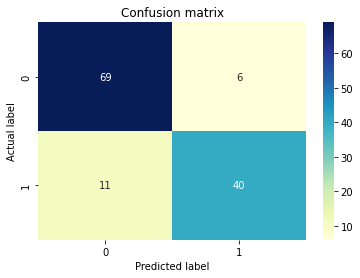

In [ ]:
from sklearn.metrics import f1_score
y_hat=pre_fun(X_test,y_test,w_new)
cm = confusion_matrix(y_test, y_hat)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(f'precision = {precision_score(y_test, y_hat):.3}')
print(f'recall = {recall_score(y_test, y_hat):.3}')
f1_score = f1_score(y_hat, y_test)
#F1 = 2 * (precision * recall) / (precision + recall)
print(f'f1_score =' , f1_score)

####Result####

Recall that in this milk data set, we assigned 1 to data entries labeled high and 0 to data entries labeled low. For the confusion matrix and related measurements defined above, our model gave a **Precision(Specificity)** 0.87. It shows that 87% of milk data entries labeled as high do indeed belong to high. **Recall(Sensitivity)** equals 0.784 means that 78.4% of milk data entries from high are labeled as high. Since we have handled class imbalance, **acc** is also a valuable measurement for the soft margin SVM. **Acc** equals 0.865 means that our model can correctly identify 86.5% of data entries' labels. The **F1** score is 0.8247.

#4. Reference#

Goyal, p. (2017). Why is SVM convex optimization? https://www.quora.com/Why-is-SVM-convex-optimization



Japkowicz, N., & Stephen, S. (2002). The class imbalance problem: A systematic study. Intelligent data analysis, 6(5), 429-449.



Pesme, S., Dieuleveut, A., & Flammarion, N. (2020, November). On convergence-diagnostic based step sizes for stochastic gradient descent. In International Conference on Machine Learning (pp. 7641-7651). PMLR.



Shalev-Shwartz, S., & Ben-David, S. (2014). Understanding machine learning: From theory to algorithms. Cambridge university press. https://books.google.com/books?hl=en&lr=&id=Hf6QAwAAQBAJ&oi=fnd&pg=PR15&ots=2IwgLomJR3&sig=q0KC4KtZ0mLjzt-5ZwMhkbQTbOI#v=onepage&q&f=false



Zeng, J., & Yin, W. (2018). On nonconvex decentralized gradient descent. IEEE Transactions on signal processing, 66(11), 2834-2848.
